In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

In [63]:
def load_data(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print("Dimensions: ", data.shape)
    print(data[1:6, :])
    return data

In [64]:
data = load_data('data/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [65]:
# Below I modified the indexing part to be more explicit, somehow it looks less clearer than the orginal
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    #neg = data[:,2] == 0
    #pos = data[:,2] == 1
    # If no specific axes object has been passed, create one by using `plt.gca()`
    if axes == None:
        axes = plt.gca()
    #axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[data[:, 2]==1][:, 0], data[data[:, 2]==1][:, 1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[data[:, 2]==0][:, 0], data[data[:, 2]==0][:, 1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon=True, fancybox=True);

### Logistic  Regression

In [66]:
X = np.concatenate((np.ones((data.shape[0], 1)), data[:, 0:2]), axis=1)
y = data[:, 2][:, None]
# X = np.c_[np.ones((data.shape[0],1)), data[:, 0:2]]
# y = np.c_[data[:, 2]]

In [67]:
X.shape

(100, 3)

In [68]:
y.shape

(100, 1)

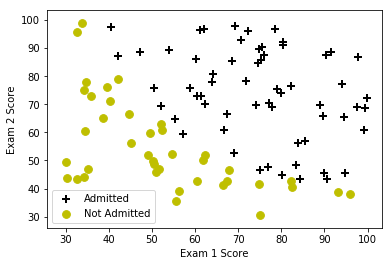

In [69]:
plot_data(data, 'Exam 1 Score', 'Exam 2 Score', 'Admitted', 'Not Admitted')

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(X\theta)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = -\frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [71]:
def cost_function(theta, X, y):
    m = y.size
    # Always stay away rank-1 array only if necessary
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    # Pay a lot attention to this fomula when it comes to dimensions
    J = -1/m * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    
    if np.isnan(J.item()):
        return np.inf
    return J.item()

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In [1]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    gradient = 1/m * X.T.dot(h - y)
    
    return gradient.flatten()

In [75]:
# Initialize the theta as 2-dimensional array
initial_theta = np.zeros(X.shape[1])

cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

print("Cost: \n", cost)
print("Gradient:\n", grad)

Cost: 
 0.6931471805599453
Gradient:
 [ -0.1        -12.00921659 -11.26284221]


In [76]:
# Optimize the cost function
res = minimize(cost_function, initial_theta, args=(X, y), method=None, jac=gradient, options={'maxiter': 400})
res
# final theta is np.array([-25.16131634,   0.2062316 ,   0.20147143])
# can be obtained by res.x

c:\programdata\anaconda3\envs\gym\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\programdata\anaconda3\envs\gym\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


      fun: 0.20349770158950992
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557621e-09,   4.36433486e-07,  -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

### Predict

In [77]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return p.astype('int')

In [78]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (minimized_cost.x)
sigmoid(np.array([1, 45, 85]).dot(minimized_cost.x))

0.77629032493310213

In [79]:
p = predict(minimized_cost.x, X)
print("Training accuracy: {:.2f}%".format(100 * sum(p==y.ravel())/p.size))

Training accuracy: 89.00%


### Decision Boundry

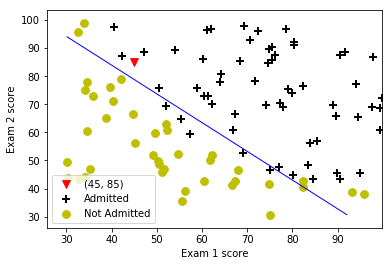

In [80]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(minimized_cost.x)).reshape(xx1.shape)
# I never thought the decision boundary need to be a contour plot
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [92]:
xx1.ravel().shape

(2500,)

In [94]:
np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].shape

(2500, 3)

In [81]:
### Regularized logistic regression
data2 = load_data('data/ex2data2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [82]:
X = data2[:, 0:2]
y = np.c_[data2[:, 2]]

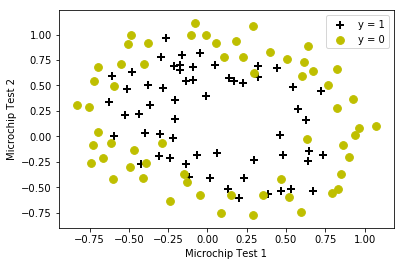

In [83]:
plot_data(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [84]:
X.shape

(118, 2)

In [85]:
y.shape

(118, 1)

### Create polynomial features from the original 

In [86]:
# Note the Polynomial function insert a column with 'ones' in the design matrix
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:, 0:2])
XX.shape

(118, 28)

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [87]:
def regularized_cost_function(theta, reg, XX, y):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1, 1)))
    
    J = -1/m * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + reg / (2*m) * np.sum(np.square(theta[1:]))
    
    if np.isnan(J.item()):
        return np.inf
    return J.item()

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [88]:
def regularized_gradient(theta, reg, XX, y):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1, 1)))
    
    gradient = 1/m * XX.T.dot(h - y) + reg/m * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    
    return gradient.flatten()

In [89]:
initial_theta = np.zeros(XX.shape[1])

regularized_cost_function(initial_theta, 1, XX, y)

0.6931471805599454

c:\programdata\anaconda3\envs\gym\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


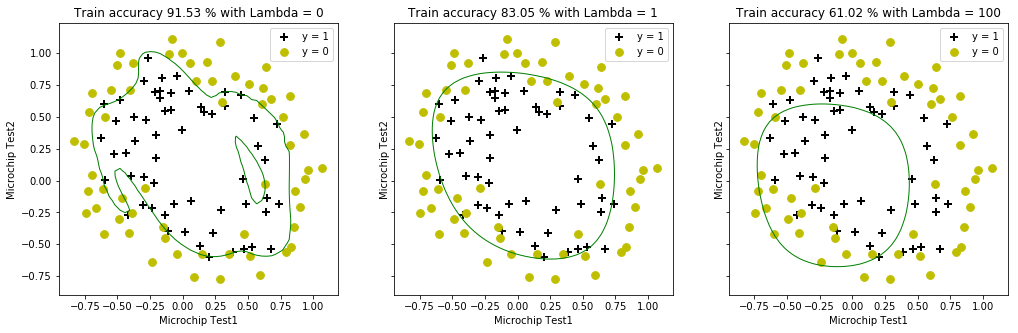

In [90]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))

# Try different regularization parameters
# Lambda = 0: No regularization, with the model tend to overfiting
# Lambda = 1: looks about right
# Lambda = 100: Too much regularization, make the model underfitting

for i, reg in enumerate([0, 1, 100]):
    # Optimize cost function
    res = minimize(regularized_cost_function, initial_theta, args=(reg, XX, y), method=None, jac=regularized_gradient, options={'maxiter': 3000})
    
    # Accuracy
    accuracy = 100 * sum(predict(res.x, XX) == y.ravel()) / y.size
    
    # Scatter plot of X, y
    plot_data(data2, 'Microchip Test1', 'Microchip Test2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res.x)).reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    axes.flatten()[i].set_title('Train accuracy {} % with Lambda = {}'.format(np.round(accuracy, decimals=2), reg))